In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"istiakfahim","key":"02dff5e518143252620658065b883a94"}'}

In [ ]:
import os
# Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Set permissions for the API key file
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis


Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0


In [ ]:
!unzip customer-personality-analysis.zip


Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')  # Update file name and delimiter if necessary
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.shape

(2240, 29)

In [ ]:
# # Save your DataFrame to a CSV file
# data.to_csv('output.csv', index=False)

# # Download the CSV file
# from google.colab import files
# files.download('output.csv')


In [ ]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Show descriptive statistics for numerical columns
data.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Get the data types of each column
data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
# Check for unique values in each column
data.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [ ]:
# Check for missing values in each column
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
# Drop rows where 'Income' is missing
data = data.dropna(subset=['Income'])

In [ ]:
# Verify if missing values are removed
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Check columns with constant or nearly constant values
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")


ID: 2216 unique values
Year_Birth: 59 unique values
Education: 5 unique values
Marital_Status: 8 unique values
Income: 1974 unique values
Kidhome: 3 unique values
Teenhome: 3 unique values
Dt_Customer: 662 unique values
Recency: 100 unique values
MntWines: 776 unique values
MntFruits: 158 unique values
MntMeatProducts: 554 unique values
MntFishProducts: 182 unique values
MntSweetProducts: 176 unique values
MntGoldProds: 212 unique values
NumDealsPurchases: 15 unique values
NumWebPurchases: 15 unique values
NumCatalogPurchases: 14 unique values
NumStorePurchases: 14 unique values
NumWebVisitsMonth: 16 unique values
AcceptedCmp3: 2 unique values
AcceptedCmp4: 2 unique values
AcceptedCmp5: 2 unique values
AcceptedCmp1: 2 unique values
AcceptedCmp2: 2 unique values
Complain: 2 unique values
Z_CostContact: 1 unique values
Z_Revenue: 1 unique values
Response: 2 unique values


In [ ]:
# Drop columns
columns_to_drop = ['ID', 'Z_CostContact', 'Z_Revenue']  # Adjust based on your findings
data = data.drop(columns=columns_to_drop)


In [ ]:
data.shape


(2216, 26)

In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,...,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,...,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#counting the values per category in Marital_Status
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [ ]:
#Reducing the numbet of categories in Marital Status
data['Marital_Status']=data['Marital_Status'].replace({'Alone':'Single','YOLO':'Single','Absurd':'Single', 'Together':'Married', 'Widow':'Divorced'})


In [ ]:
#counting the values per category in Marital_Status
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,1430
Single,478
Divorced,308


In [ ]:
#counting the values per category in Marital_Status
data['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [ ]:
#Reducing the numbet of categories in Education
data['Education'] = data['Education'].replace({'Basic':'UnderGrad','2n Cycle':'UnderGrad'})

In [ ]:
data['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
UnderGrad,254


In [ ]:
#Create a new variable to calculate total no. of children
data['Total_children'] = data['Teenhome']+data['Kidhome']

In [ ]:
data.shape

(2216, 27)

In [ ]:
#Find out the age of customers
data['Age'] = 2024-data['Year_Birth']

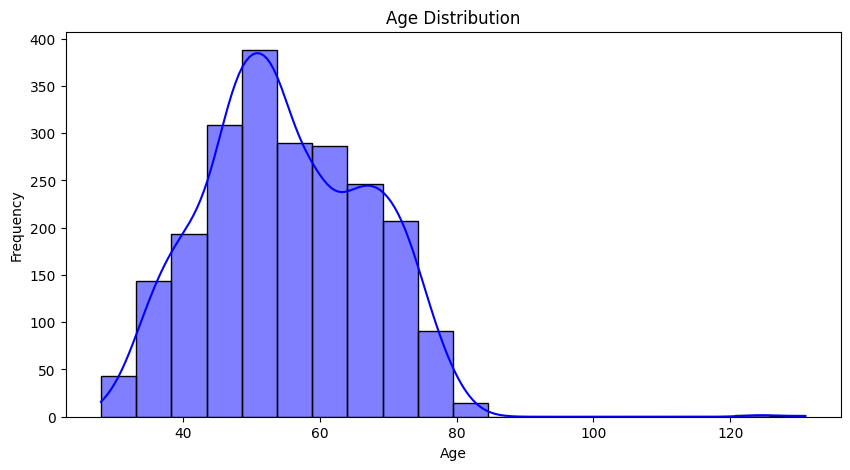

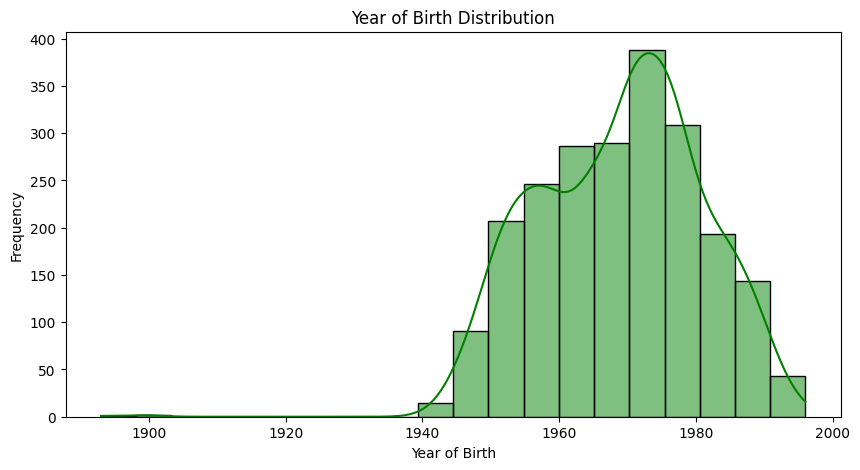

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram for Year_Birth
plt.figure(figsize=(10, 5))
sns.histplot(data['Year_Birth'], bins=20, kde=True, color='green')
plt.title('Year of Birth Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#removing outliers from age - clipping the age at 81
data['Age'] = data['Age'].clip(upper=81)

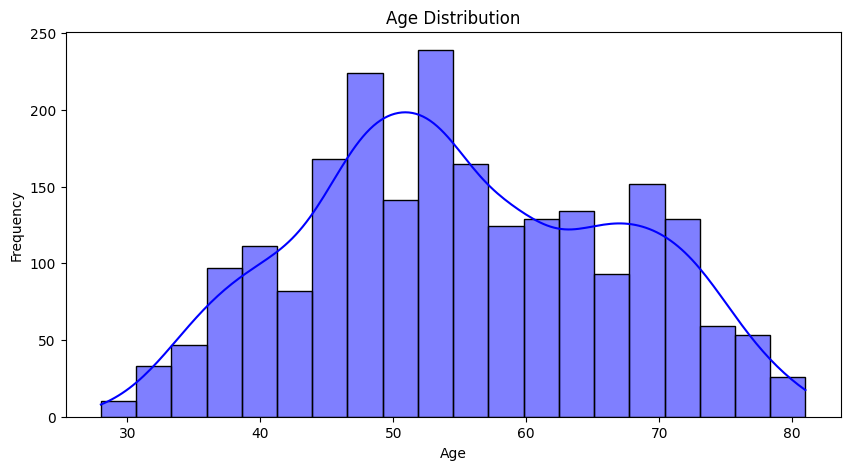

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


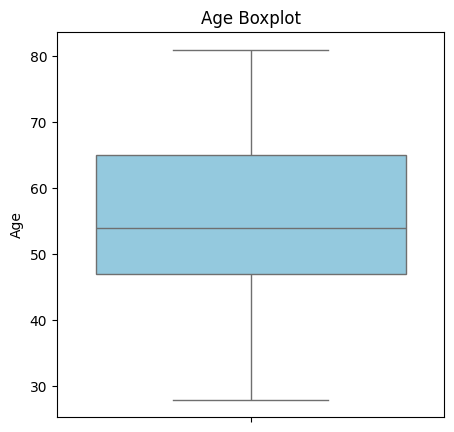

In [ ]:
# Boxplot for Age
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Age'], color='skyblue')
plt.title('Age Boxplot')
plt.ylabel('Age')
plt.show()


<ipython-input-34-1455225a0799>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='viridis', order=data['Education'].value_counts().index)


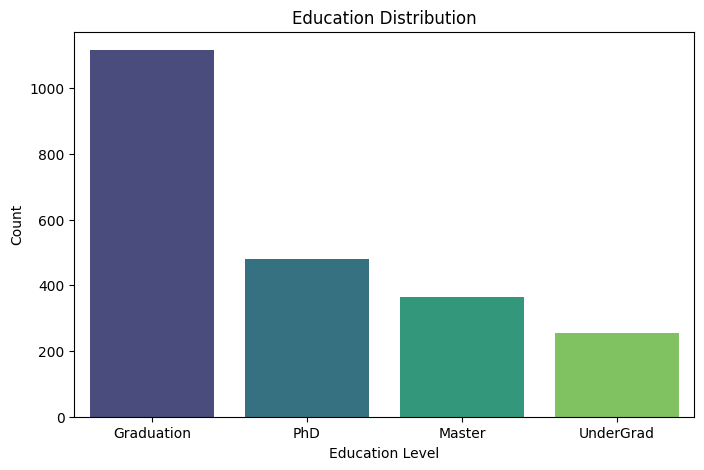

In [ ]:
# Barplot for Education
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', data=data, palette='viridis', order=data['Education'].value_counts().index)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


<ipython-input-35-8785fb70ff2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status', data=data, palette='coolwarm', order=data['Marital_Status'].value_counts().index)


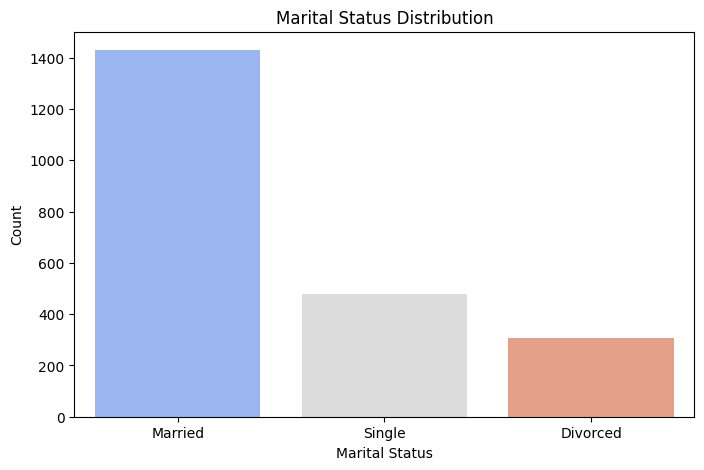

In [ ]:
# Barplot for Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital_Status', data=data, palette='coolwarm', order=data['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

<ipython-input-36-f699edc8730d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=data, palette='Set2')


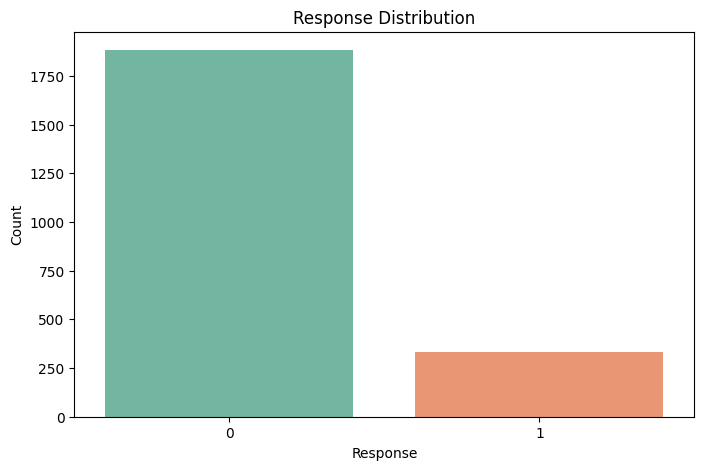

In [ ]:
# Barplot for Response
plt.figure(figsize=(8, 5))
sns.countplot(x='Response', data=data, palette='Set2')
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


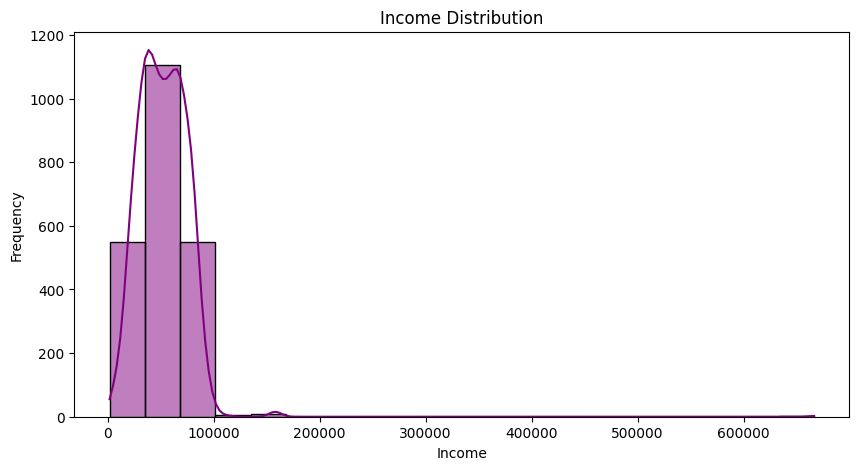

In [ ]:
# Histogram for Income
plt.figure(figsize=(10, 5))
sns.histplot(data['Income'], bins=20, kde=True, color='purple')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()




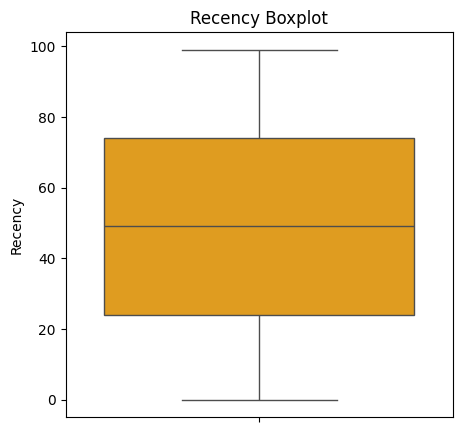

In [ ]:
# Boxplot for Recency
plt.figure(figsize=(5, 5))
sns.boxplot(y=data['Recency'], color='orange')
plt.title('Recency Boxplot')
plt.ylabel('Recency')
plt.show()



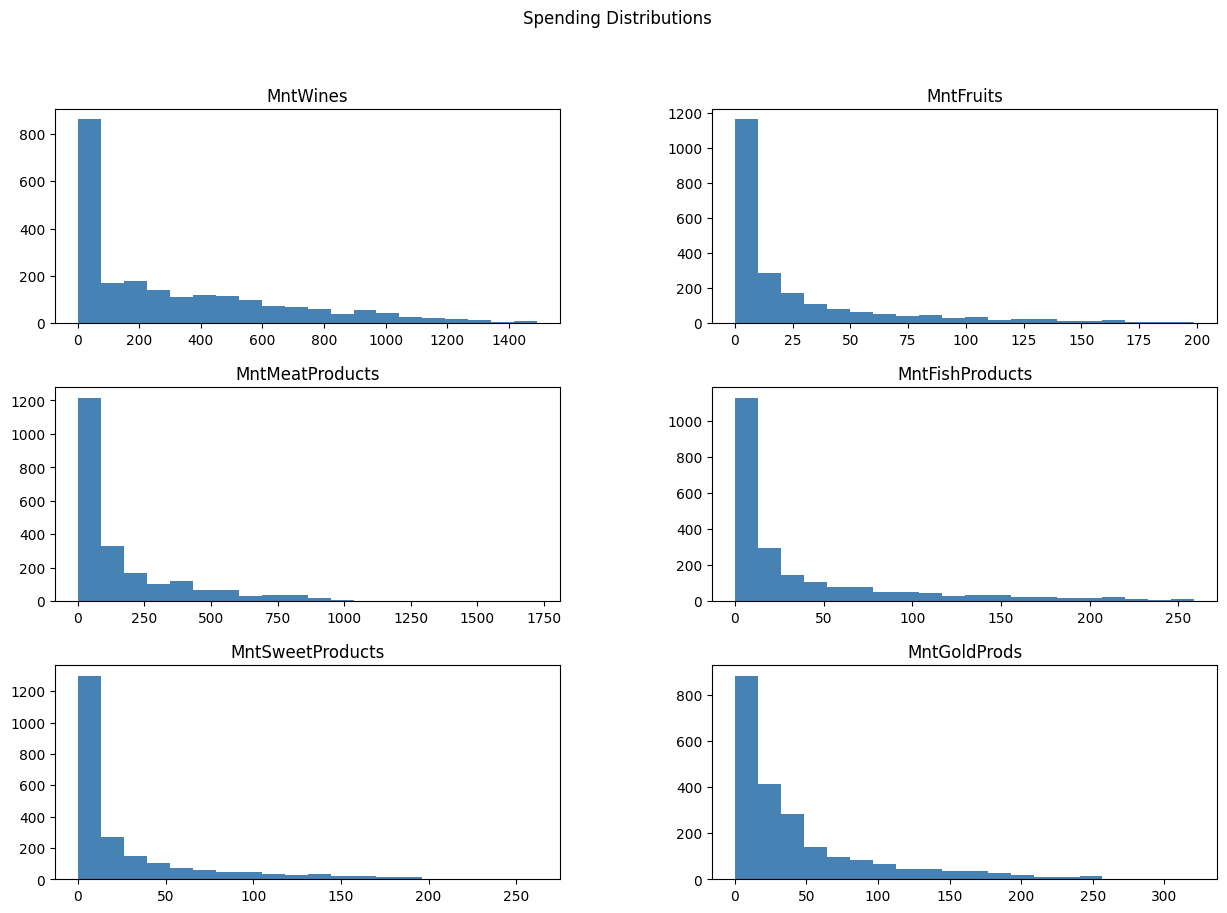

In [ ]:
# Histograms for Spending Columns
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data[spending_cols].hist(bins=20, figsize=(15, 10), color='steelblue', grid=False)
plt.suptitle('Spending Distributions')
plt.show()

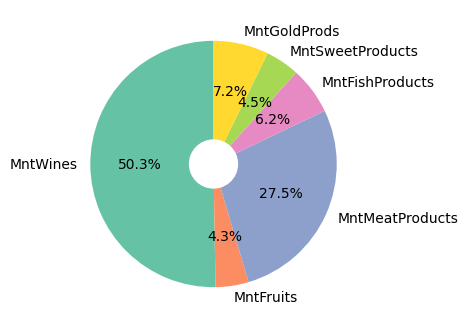

In [ ]:
#Distribution of Products
products = data.loc[:,['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]
products_total = products.sum()
#products_tot

plt.figure(figsize=(4,4))
plt.pie(products_total,labels=products_total.index,wedgeprops={'width': 0.8},textprops={'fontsize': 10},autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.show()

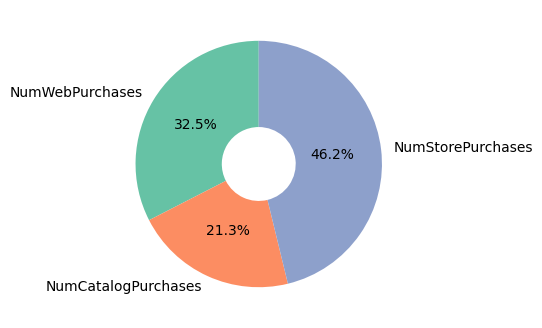

In [ ]:
#distribution of Places
places = data.loc[:,[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']]
places_tot = places.sum()

plt.figure(figsize=(4,4))
plt.pie(places_tot,labels=places_tot.index,wedgeprops={'width': 0.7},textprops={'fontsize': 10},
        autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.show()

In [ ]:
#create new columns which calculate the total expenses, accepted coupons and place of purchase
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Tot_AcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']
data['Tot_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [ ]:
data['Total_Expenses'].describe()

,Total_Expenses
count,2216.000000
mean,607.075361
std,602.900476
min,5.000000
25%,69.000000
50%,396.500000
75%,1048.000000
max,2525.000000


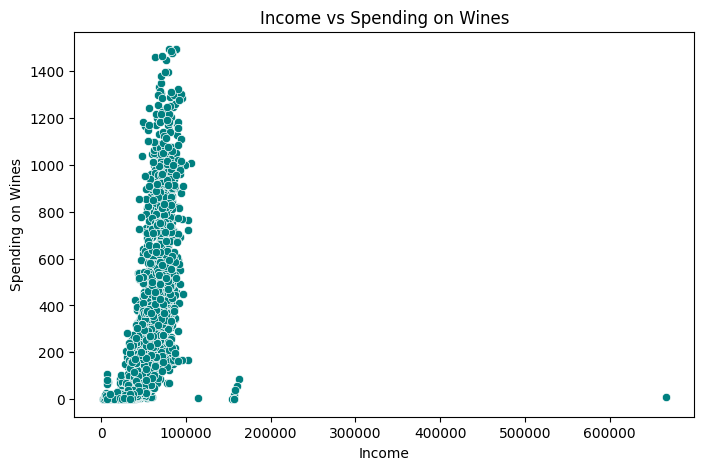

In [ ]:
# Scatterplot for Income vs Spending on Wines
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='MntWines', data=data, color='teal')
plt.title('Income vs Spending on Wines')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.show()



In [ ]:
# Identify the outlier in the Income column
outlier_threshold = data['Income'].quantile(0.99)  # Setting threshold at the 99th percentile
outlier_row = data[data['Income'] > outlier_threshold]  # Finding the outlier row

# Remove the outlier row from the dataset
data_cleaned = data[data['Income'] <= outlier_threshold]

# Print the removed row
print("Removed Outlier:")
print(outlier_row)

# Check the shape before and after removal
print(f"Original dataset size: {data.shape}")
print(f"Cleaned dataset size: {data_cleaned.shape}")

# Reassign cleaned dataset back to original variable if needed
data = data_cleaned


Removed Outlier:
      Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
124         1983  Graduation         Single  101970.0        0         0   
164         1973         PhD        Married  157243.0        0         1   
203         1977         PhD        Married  102160.0        0         0   
252         1974  Graduation       Divorced  102692.0        0         0   
617         1976         PhD        Married  162397.0        1         1   
646         1970  Graduation        Married  105471.0        0         0   
650         1960      Master         Single   98777.0        0         0   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
914         1994  Graduation         Single   95529.0        0         0   
1001        1987         PhD         Single   95169.0        0         0   
1113        1960      Master         Single   98777.0        0         

Explanation:<br>
Step 1: Find the 99th percentile (quantile(0.99)) of income to detect extreme outliers.<br>
Step 2: Filter out the row(s) where income is greater than this threshold.<br>
Step 3: Remove the identified outlier row.<br>
Step 4: Print the removed row for verification.<br>
Step 5: Check the dataset size before and after removal.

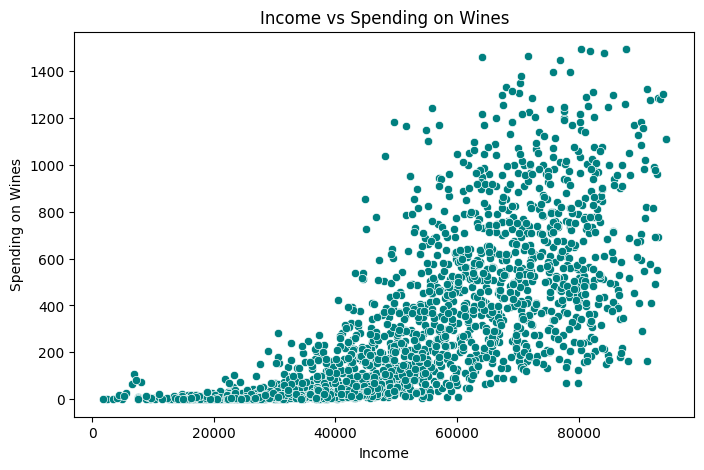

In [ ]:
# Scatterplot for Income vs Spending on Wines
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='MntWines', data=data, color='teal')
plt.title('Income vs Spending on Wines')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.show()

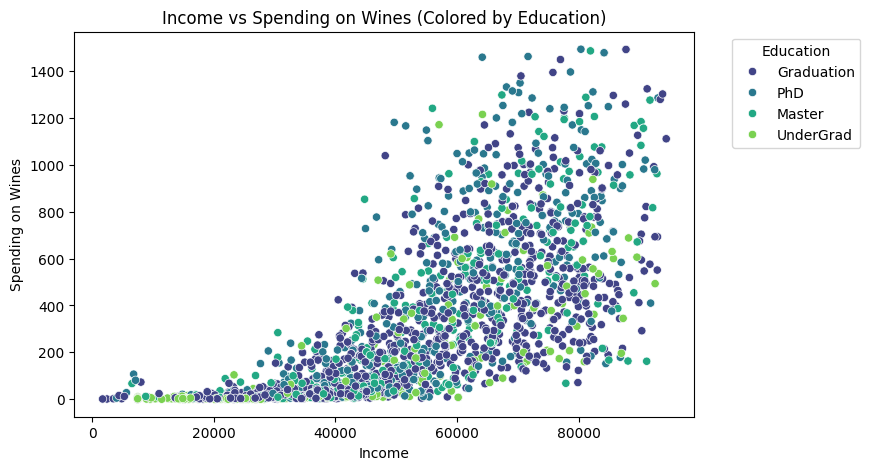

In [ ]:
# Scatterplot with Hue for Education
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='MntWines', hue='Education', data=data, palette='viridis')
plt.title('Income vs Spending on Wines (Colored by Education)')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



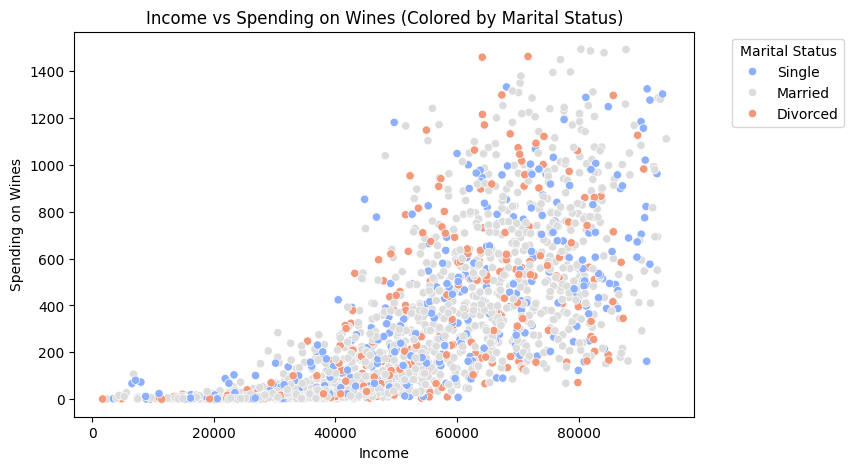

In [ ]:

# Scatterplot with Hue for Marital_Status
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='MntWines', hue='Marital_Status', data=data, palette='coolwarm')
plt.title('Income vs Spending on Wines (Colored by Marital Status)')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

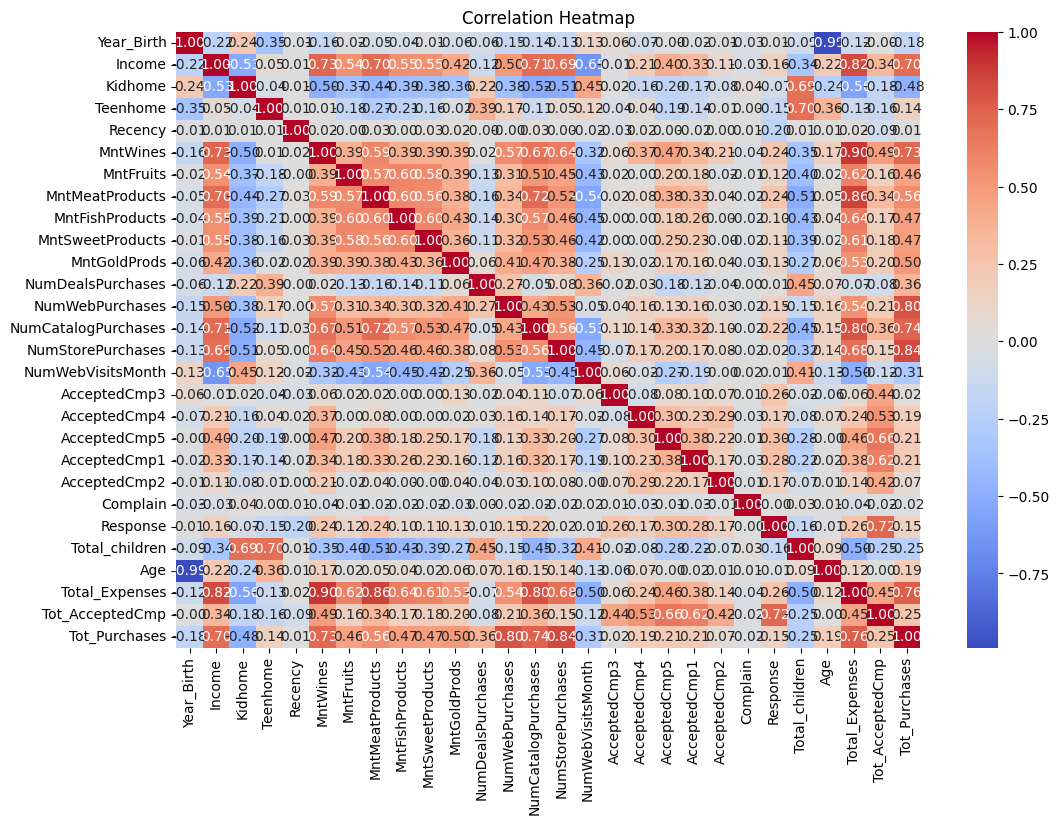

In [ ]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


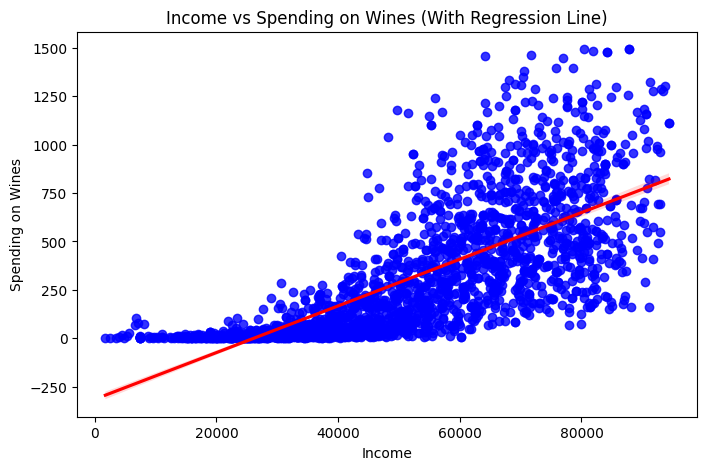

In [ ]:
# Scatterplot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x='Income', y='MntWines', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Income vs Spending on Wines (With Regression Line)')
plt.xlabel('Income')
plt.ylabel('Spending on Wines')
plt.show()


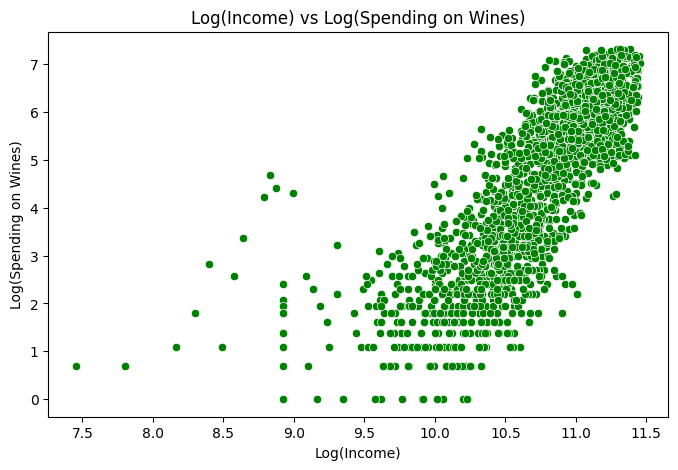

In [ ]:
import numpy as np

# Scatterplot with Log Transformation
plt.figure(figsize=(8, 5))
sns.scatterplot(x=np.log1p(data['Income']), y=np.log1p(data['MntWines']), data=data, color='green')
plt.title('Log(Income) vs Log(Spending on Wines)')
plt.xlabel('Log(Income)')
plt.ylabel('Log(Spending on Wines)')
plt.show()


<ipython-input-52-807de80598a1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending = data.groupby('Income_Bin')['MntWines'].mean().reset_index()
<ipython-input-52-807de80598a1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Bin', y='MntWines', data=avg_spending, palette='coolwarm')


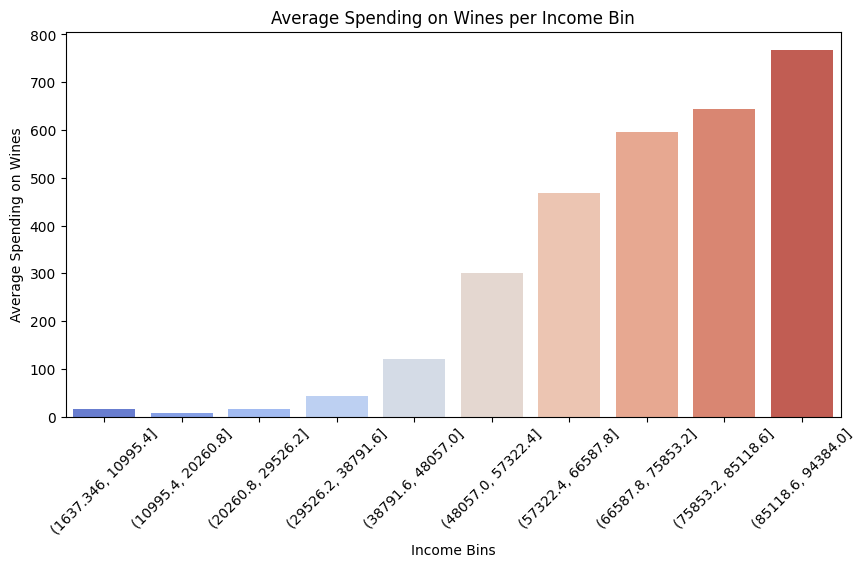

In [ ]:
# Create Bins for Income
data['Income_Bin'] = pd.cut(data['Income'], bins=10)

# Barplot for Average Spending per Income Bin
plt.figure(figsize=(10, 5))
avg_spending = data.groupby('Income_Bin')['MntWines'].mean().reset_index()
sns.barplot(x='Income_Bin', y='MntWines', data=avg_spending, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Spending on Wines per Income Bin')
plt.xlabel('Income Bins')
plt.ylabel('Average Spending on Wines')
plt.show()


In [ ]:
print(data.columns)


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_children', 'Age',
       'Total_Expenses', 'Tot_AcceptedCmp', 'Tot_Purchases', 'Income_Bin'],
      dtype='object')


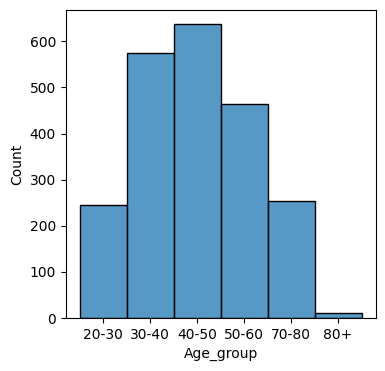

In [ ]:
#Create a new variable 'Age_group' to form groups of customers by age
bins=[30,40,50,60,70,80,90]
labels = ['20-30','30-40','40-50','50-60','70-80','80+']

data['Age_group'] = pd.cut(data['Age'],bins=bins,labels=labels)
plt.figure(figsize=(4,4))
sns.histplot(data['Age_group'])
plt.show()


<ipython-input-55-c992d42cba46>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g1 = data.groupby(['Age_group','Marital_Status'])['Income'].sum().reset_index().sort_values(by='Age_group')


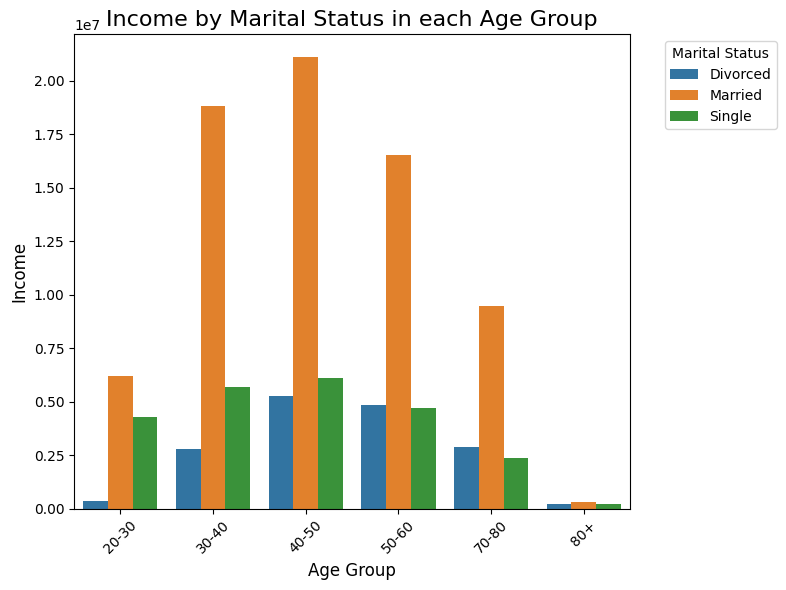

In [ ]:
g1 = data.groupby(['Age_group','Marital_Status'])['Income'].sum().reset_index().sort_values(by='Age_group')

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=g1,x='Age_group',y='Income',hue='Marital_Status')
ax.set_title('Income by Marital Status in each Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Income', fontsize=12)
ax.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: 'Married' customers have the maximum income in all age groups - probably because it is the sum of two salaries (two people)

<ipython-input-56-7712d2d0c91a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g2=data.groupby(['Education','Age_group'])['Income'].sum().reset_index().sort_values(by='Age_group')


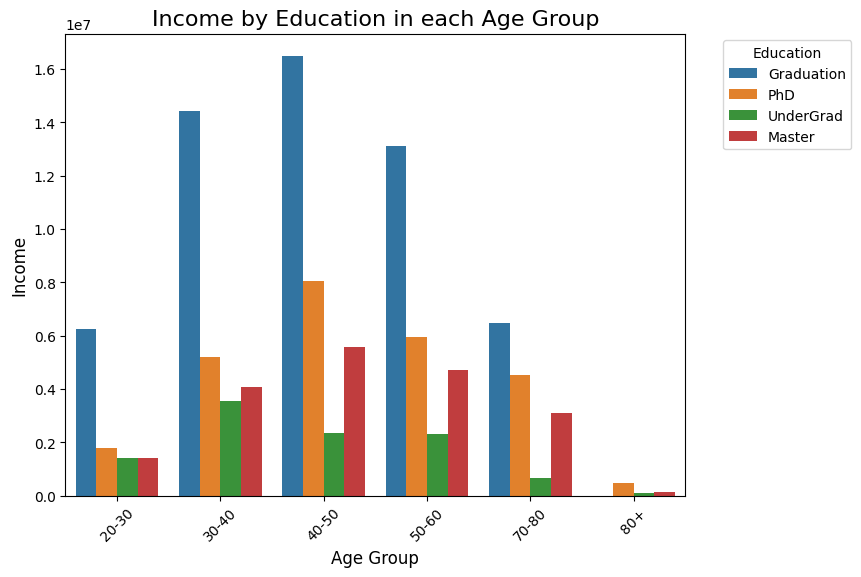

In [ ]:
g2=data.groupby(['Education','Age_group'])['Income'].sum().reset_index().sort_values(by='Age_group')

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=g2,x='Age_group',y='Income',hue='Education')
ax.set_title('Income by Education in each Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Income', fontsize=12)
ax.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Observation: Graduates earn the most on all age groups followed by PhD and Masters

<ipython-input-57-6dd4fe9f7e68>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g3 = data.groupby(['Total_children', 'Age_group'])['Total_Expenses'].sum().reset_index().sort_values(by='Age_group')


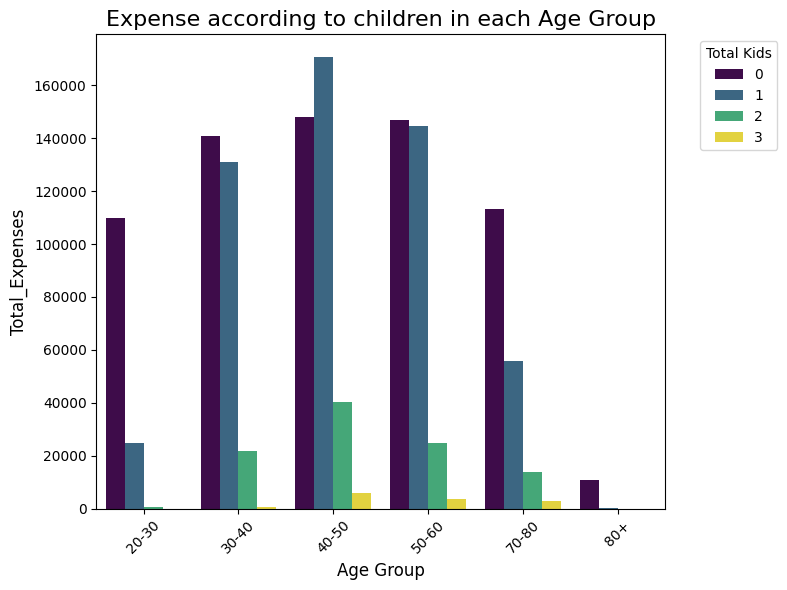

In [ ]:
g3 = data.groupby(['Total_children', 'Age_group'])['Total_Expenses'].sum().reset_index().sort_values(by='Age_group')

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=g3, x='Age_group', y='Total_Expenses', hue='Total_children', palette='viridis')  # Change 'Blues' to any color palette
ax.set_title('Expense according to children in each Age Group', fontsize=16)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Total_Expenses', fontsize=12)
ax.legend(title='Total Kids', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation: Almost in all age groups customers with 0 or 1 kids spend significantly more as compared to customers with 2 or 3 kids

In [ ]:
#Function to create stacked barchart
def stackbar(data):
    categories = data.index
    values = data.values
    columns=data.columns

    fig, ax = plt.subplots(figsize=(8,6))
    cum_sum=np.zeros(len(categories))

    for i,columns in enumerate(columns):
        plot = ax.bar(categories, values[:,i],bottom=cum_sum,label=columns)
        cum_sum+=values[:,i]
    return (plot)

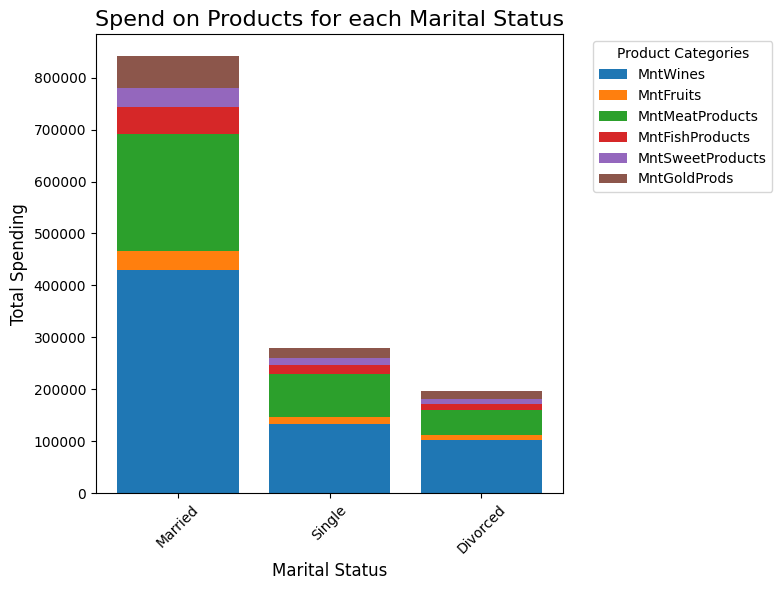

In [ ]:
group1 = data.groupby('Marital_Status').agg({'MntWines':'sum', 'MntFruits':'sum',
       'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum',
       'MntGoldProds':'sum'}).sort_values(by='MntWines',ascending=False)

stackbar(group1)
# Add labels, title, and legend
plt.title('Spend on Products for each Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: 'Married' customers are the biggest spenders - spending maximum on Wine and Meat products

<ipython-input-60-2fde6f09236b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group2 = data.groupby('Age_group').agg({'MntWines':'sum', 'MntFruits':'sum',


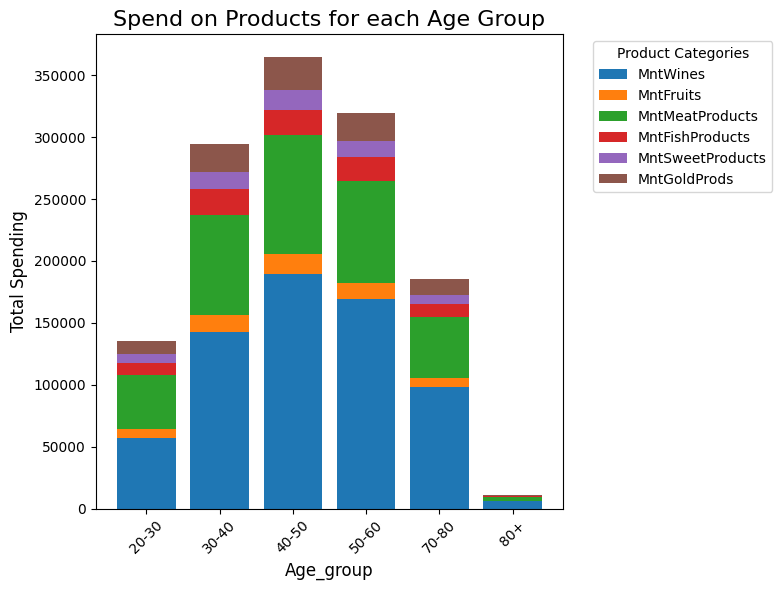

In [ ]:
group2 = data.groupby('Age_group').agg({'MntWines':'sum', 'MntFruits':'sum',
       'MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum',
       'MntGoldProds':'sum'}).sort_values(by='Age_group')

stackbar(group2)
# Add labels, title, and legend
plt.title('Spend on Products for each Age Group', fontsize=16)
plt.xlabel('Age_group', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Customers in the age group of 30-60 are the biggest buyer and and spend mostly on Wine and Meat

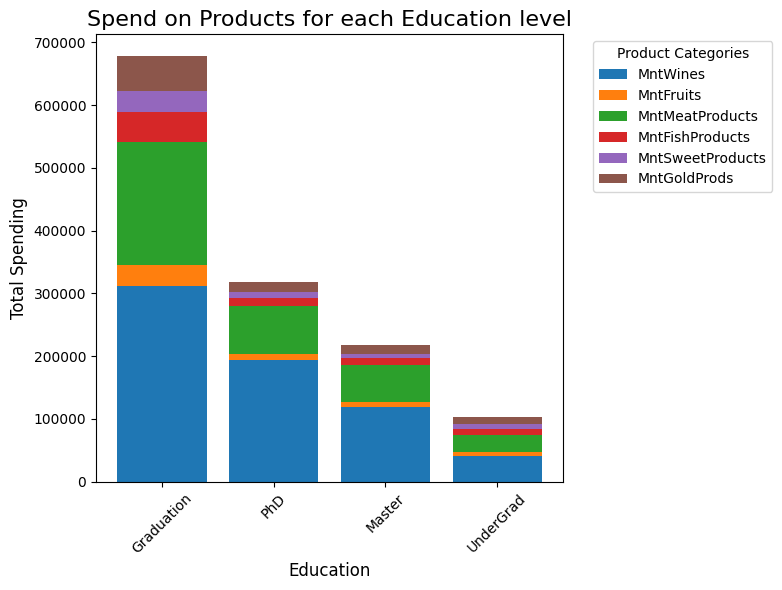

In [ ]:
group3 = data.groupby('Education').agg({'MntWines':'sum', 'MntFruits':'sum','MntMeatProducts':'sum', 'MntFishProducts':'sum', 'MntSweetProducts':'sum',
       'MntGoldProds':'sum'}).sort_values(by='MntWines',ascending=False)

stackbar(group3)
# Add labels, title, and legend
plt.title('Spend on Products for each Education level', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.legend(title='Product Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Graduates are the biggest buyers of all, this also correlates with the Income chart where the Graduate customers also earn the maximum.

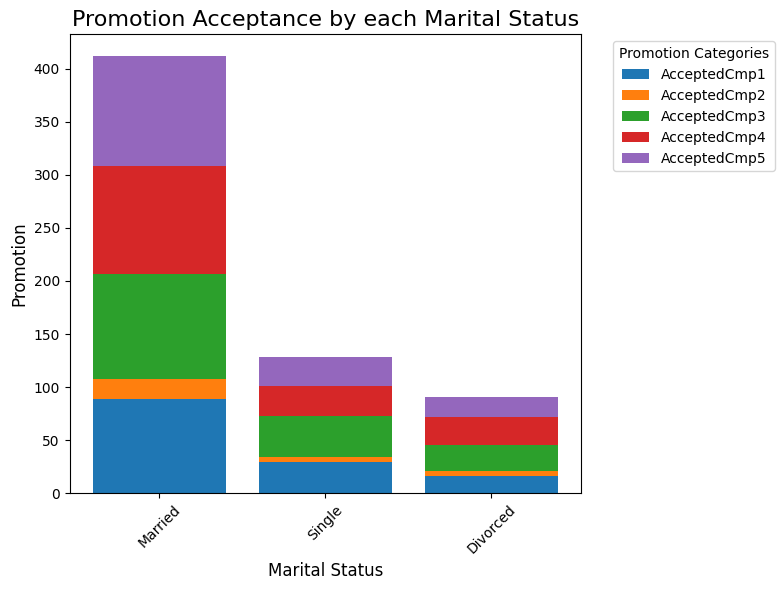

In [ ]:
group4 = data.groupby(['Marital_Status']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',
    'AcceptedCmp5':'sum', }).sort_values(by='AcceptedCmp1',ascending=False)


stackbar(group4)
# Add labels, title, and legend
plt.title('Promotion Acceptance by each Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Promotion', fontsize=12)
plt.legend(title='Promotion Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ovservation: Even though the 'Married' customers are more likely to accept promotions - there is a significantly low number of customers who accepted the offer in the 2nd campaign

<ipython-input-63-db0b9f86c267>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group5 = data.groupby(['Age_group']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',


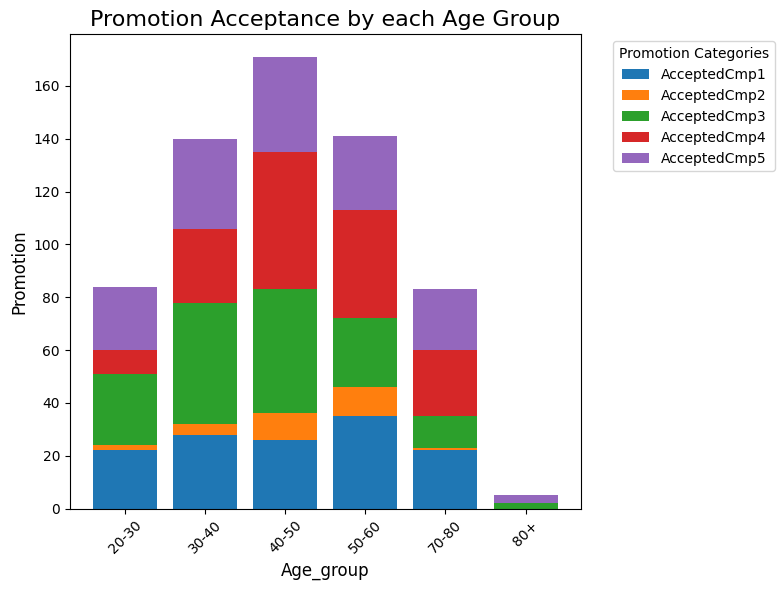

In [ ]:

group5 = data.groupby(['Age_group']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',
    'AcceptedCmp5':'sum', }).sort_values(by='Age_group')

stackbar(group5)
# Add labels, title, and legend
plt.title('Promotion Acceptance by each Age Group', fontsize=16)
plt.xlabel('Age_group', fontsize=12)
plt.ylabel('Promotion', fontsize=12)
plt.legend(title='Promotion Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Customers in age group of 30-60 are more likely to accept the offer in 3rd, 4th or 5th attempt.

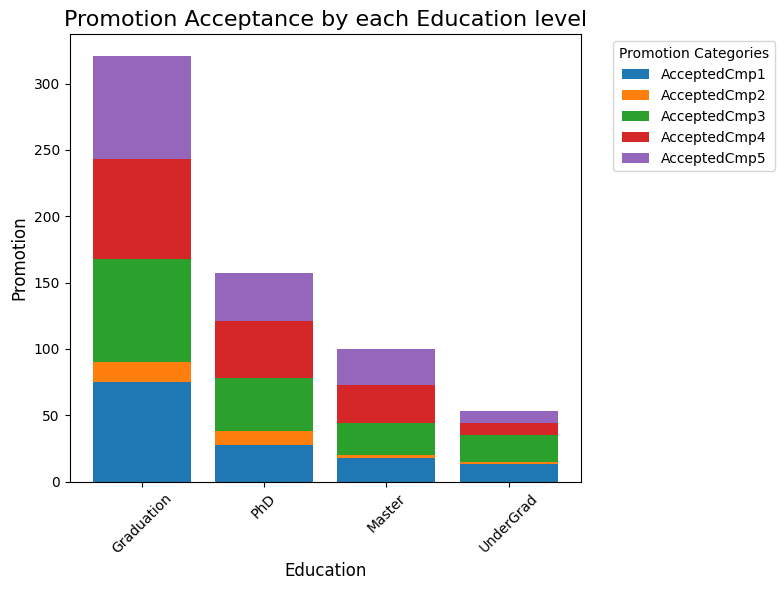

In [ ]:
group6 = data.groupby(['Education']).agg({'AcceptedCmp1':'sum','AcceptedCmp2':'sum','AcceptedCmp3':'sum','AcceptedCmp4': 'sum',
    'AcceptedCmp5':'sum',}).sort_values(by='AcceptedCmp1',ascending=False)

stackbar(group6)
# Add labels, title, and legend
plt.title('Promotion Acceptance by each Education level', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Promotion', fontsize=12)
plt.legend(title='Promotion Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Graduates are more likey to accept a promotion

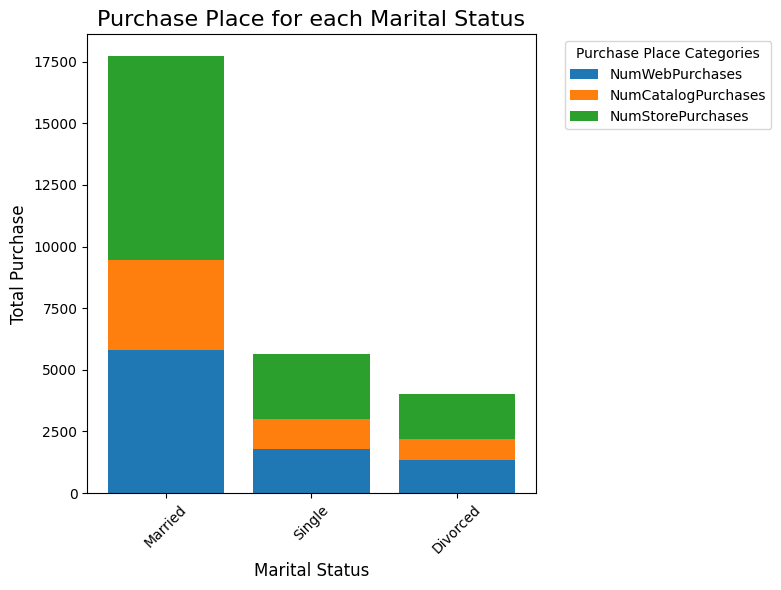

In [ ]:
group7 = data.groupby(['Marital_Status']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum',
}).sort_values(by='NumStorePurchases',ascending=False)

stackbar(group7)
# Add labels, title, and legend
plt.title('Purchase Place for each Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Total Purchase', fontsize=12)
plt.legend(title='Purchase Place Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Obseravtions: There is a clear affinity among the customers to shop from Stores follwed by a liking for Web Purchases

<ipython-input-66-a7a86d3e3021>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group8 = data.groupby(['Age_group']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum',


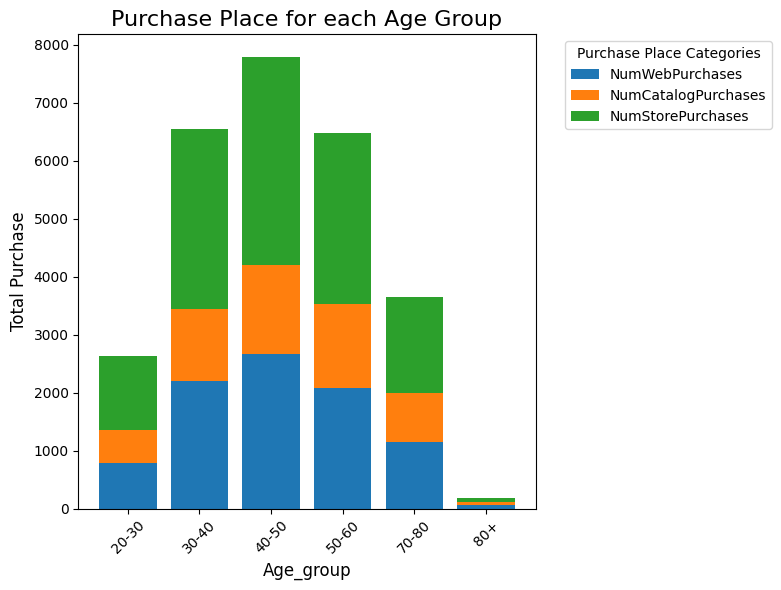

In [ ]:
group8 = data.groupby(['Age_group']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum',
}).sort_values(by='Age_group')

stackbar(group8)
# Add labels, title, and legend
plt.title('Purchase Place for each Age Group', fontsize=16)
plt.xlabel('Age_group', fontsize=12)
plt.ylabel('Total Purchase', fontsize=12)
plt.legend(title='Purchase Place Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations: here too the maximum purchases are made from Stores or through Web

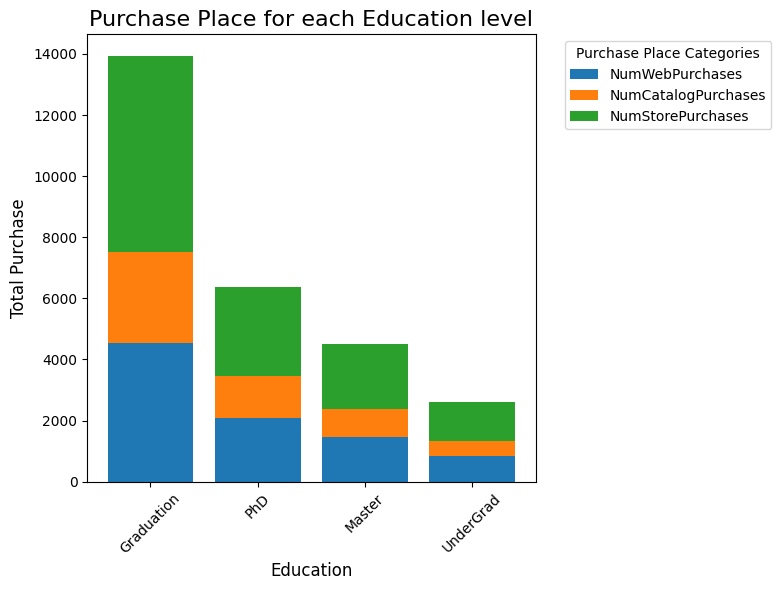

In [ ]:
group9 = data.groupby(['Education']).agg({'NumWebPurchases':'sum','NumCatalogPurchases':'sum','NumStorePurchases': 'sum'
                                    }).sort_values(by='NumStorePurchases',ascending=False)

stackbar(group9)
# Add labels, title, and legend
plt.title('Purchase Place for each Education level', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Total Purchase', fontsize=12)
plt.legend(title='Purchase Place Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation: Store and Web Purchases are the clear mode of preference for all customers

EDA Conclusion: Product Recomendations based on Observations¶

📊 This EDA has given us key insights into customer behaviours. It gave us a fair idea of how a customer's age, income, education and total kids can impact their shopping choices.

👥 This information can be leveraged in curating bespoke offers for a certain segment of customers.

eg. A customer who's 'Married' and in the age bracket of '40-50' will be more likely to buy 'Wines or Meat Products' thorugh a** 'discout', from a 'Store or Website'.**

🙋🏻‍♀️ Note: At this point we can also create specific Customer Personas reaching out to them with specific marketing strategies.

eg. A Customer Persona can be: Single--Graduate--(Age:20-30)

# Some more Data Preprocessing below

In [ ]:
df = data.copy()
df = df.drop(['Dt_Customer', 'Age_group', 'Income_Bin'],axis=1)

In [ ]:
#Converting Categorical variables into numrerical
LE = LabelEncoder()
for i in df:
    if df[i].dtype=='object':
        df[i] = LE.fit_transform(df[i])

In [ ]:
#Scale Values
SS = StandardScaler()
scaled_data = pd.DataFrame(SS.fit_transform(df.values),index=df.index,columns=df.columns)
scaled_data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_children,Age,Total_Expenses,Tot_AcceptedCmp,Tot_Purchases
0,-0.984591,-0.868519,1.567802,0.334866,-0.827967,-0.935269,0.308646,0.988124,1.557380,1.776025,...,-0.270964,-0.255108,-0.115763,-0.098329,2.406133,-1.275620,1.012190,1.700295,0.649185,1.337879
1,-1.235176,-0.868519,1.567802,-0.243382,1.032414,0.904233,-0.383016,-0.871116,-0.636706,-0.729519,...,-0.270964,-0.255108,-0.115763,-0.098329,-0.415605,1.400071,1.268392,-0.959788,-0.499857,-1.161130
2,-0.316364,-0.868519,-0.126722,0.995531,-0.827967,-0.935269,-0.798014,0.365398,0.573824,-0.168092,...,-0.270964,-0.255108,-0.115763,-0.098329,-0.415605,-1.275620,0.328985,0.293295,-0.499857,0.811772
3,1.270675,-0.868519,-0.126722,-1.209155,1.032414,-0.935269,-0.798014,-0.871116,-0.561048,-0.664561,...,-0.270964,-0.255108,-0.115763,-0.098329,-0.415605,0.062225,-1.293627,-0.916290,-0.499857,-0.898077
4,1.020090,0.974405,-0.126722,0.342465,1.032414,-0.935269,1.553638,-0.388429,0.422508,-0.209851,...,-0.270964,-0.255108,-0.115763,-0.098329,-0.415605,0.062225,-1.037425,-0.298950,-0.499857,0.548718


# Dimentionality Reduction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#Use PCA to reduce dimensions in the dataset
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["Expenses","Income", "TotSpends"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Expenses,2193.0,9.720147e-17,2.995644,-5.139855,-2.751798,-0.673849,2.394140,9.303504
Income,2193.0,-5.832088e-17,1.724538,-6.940246,-1.333552,0.051393,1.306116,5.005499
TotSpends,2193.0,-3.564054e-17,1.607165,-4.169986,-0.818158,-0.253037,0.598073,8.912567


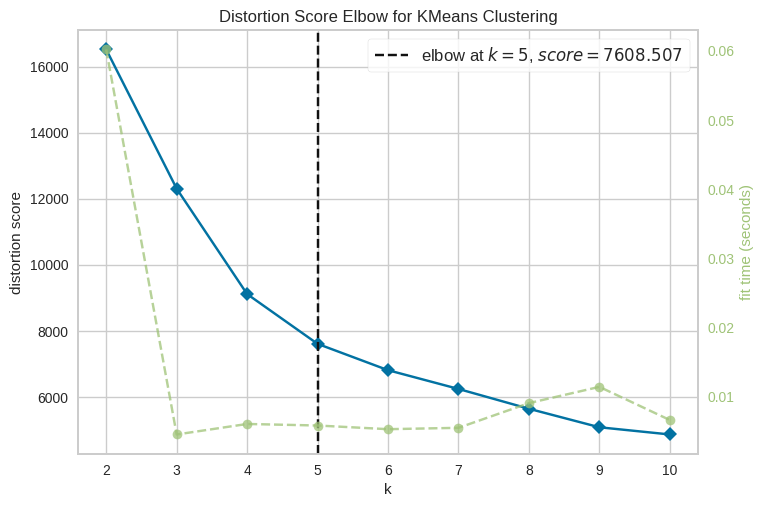

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Using Elbow method to determine the most optimal cluster
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_ds) # Fit the data to the visualizer
visualizer.show()

In [ ]:
from sklearn.metrics import silhouette_score

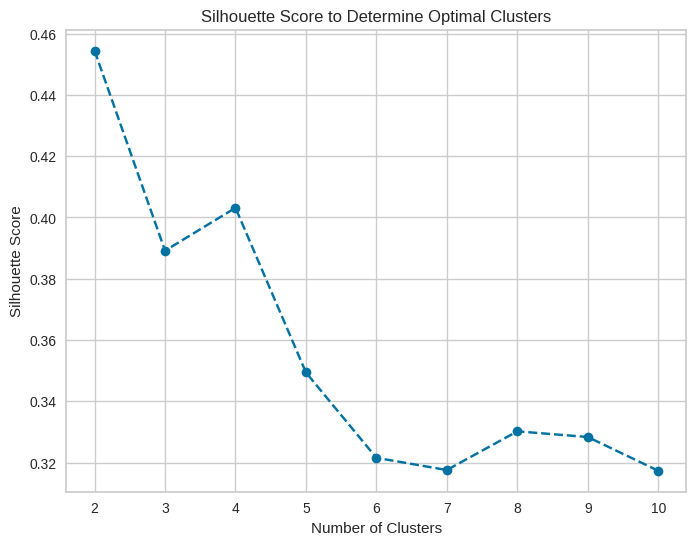

In [ ]:
#Using Silhoutte score to find the most optimal clusters


silhouette_scores = []

# Run K-Means for cluster numbers from 2 to 10 and calculate silhouette score
for i in range(2, 11):  # Silhouette score cannot be calculated for 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(PCA_ds)
    score = silhouette_score(PCA_ds, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores to find the optimal cluster number
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Clustering and Model Interpretation

Observation: Based on the above two charts the most optimal cluster numbers seems to be 2, 4 and 5. We'll analyse all three models to get an idea of how these clusters can help marketing teams to target specific customer **segments**

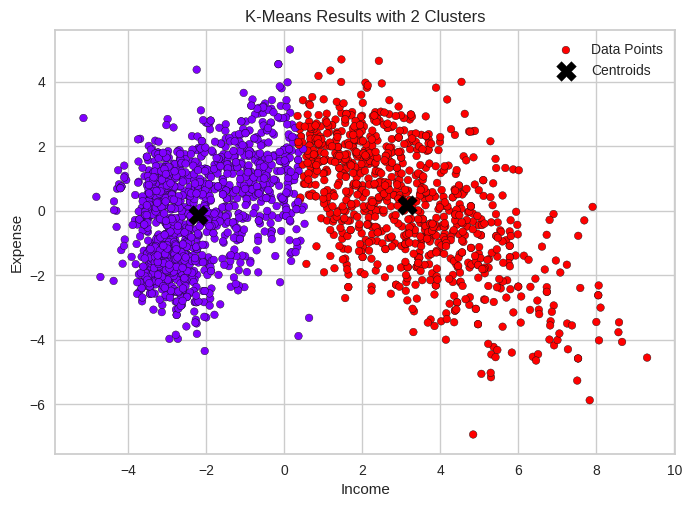

In [ ]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(PCA_ds)

#Get cluster labels
labels2 = kmeans2.labels_

# Add cluster labels to the original data
df['Cluster'] = kmeans2.labels_

plt.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=labels2, cmap='rainbow', s=30, label='Data Points',edgecolor='k')

# Plot cluster centroids
centroids2 = kmeans2.cluster_centers_
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Results with 2 Clusters")
plt.xlabel('Income')
plt.ylabel('Expense')
plt.grid(True)
plt.legend()
plt.show()

**Observation:** The 2 cluster KMeans gives us a clearly defined chart separated by Income :

Basically dividing the customers in 2 clusters with low and high income

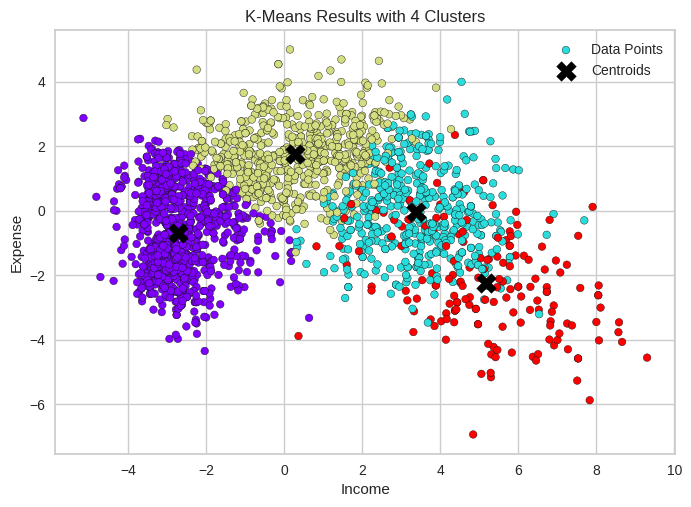

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(PCA_ds)

#Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_

plt.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=labels, cmap='rainbow', s=30, label='Data Points',edgecolor='k')

# Plot cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Results with 4 Clusters")
plt.xlabel('Income')
plt.ylabel('Expense')
plt.grid(True)
plt.legend()
plt.show()

**Observation:** The 4 cluster KMeans gave us 4 distinct clusters - However, there appears to be some overlap between the clusters. Despite this, it provides flexibility in understanding customer expenses with respect to their Income.<br><br>

Cluster 1 with 🟡 datapoints : segments customers with low Income and low/high Expense<br>
Cluster 2 with 🟣 datapoints : segments customers with low/high Income and low Expense<br>
Cluster 3 with 🔵 datapoints : segments customers with high Income with low/high Expense<br>
Cluster 4 with 🔴 datapoints : segments customers with high Income and high Expense<br><br>
**To target specific customer segments we can map the demographic of each customer(based on above EDA) and create our marketing strategies accordingly.**

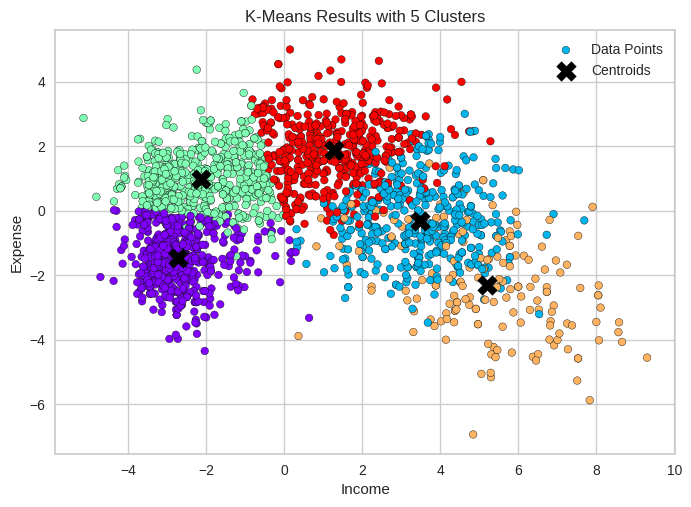

In [ ]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(PCA_ds)

#Get cluster labels
labels5 = kmeans5.labels_

# Add cluster labels to the original data
df['Cluster'] = kmeans5.labels_

plt.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=labels5, cmap='rainbow', s=30, label='Data Points',edgecolor='k')

# Plot cluster centroids
centroids5 = kmeans5.cluster_centers_
plt.scatter(centroids5[:, 0], centroids5[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Results with 5 Clusters")
plt.xlabel('Income')
plt.ylabel('Expense')
plt.grid(True)
plt.legend()
plt.show()

**Observation:** The 5 cluster KMeans gave us 5 distinct clusters - Below is how we can define each customer segment:<br><br>

Cluster 1 with 🟣 datapoints : segments customers with low Income and high Expense<br>
Cluster 2 with 🟢 datapoints : segments customers with low Income and low Expense<br>
Cluster 3 with 🔴 datapoints : segments customers with high Income and low Expense<br>
Cluster 4 with 🔵 datapoints : segments customers with high income and high Expense<br>
Cluster 5 with 🟡 datapoints : segments customers with high income and very high Expense<br><br>
**In this case Cluster 1, with low income and low expense, is of least interest to us...and we should aggresively target customers from 2 and 3**

# Model Evaluation

Silhouette Score with 2 clusters: 0.4543891123975556
Davies-Bouldin Score with 2 clusters: 0.9380401761424159
Calinski-Harabasz Index with 2 clusters: 2032.7954682000661


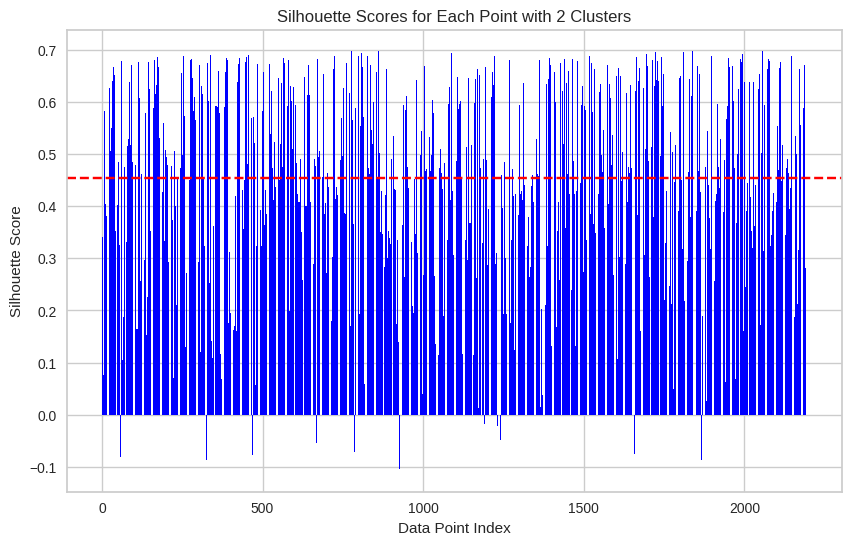

In [ ]:
# Silhouette Score for 2 clusters
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(PCA_ds, kmeans2.labels_)
print(f"Silhouette Score with 2 clusters: {sil_score}")

# Davies-Bouldin Score
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(PCA_ds, kmeans2.labels_)
print(f"Davies-Bouldin Score with 2 clusters: {db_score}")

# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(PCA_ds, kmeans2.labels_)
print(f"Calinski-Harabasz Index with 2 clusters: {ch_score}")

# Plot silhouette scores
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(PCA_ds, kmeans2.labels_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(PCA_ds)), sample_silhouette_values, color='blue')
plt.axhline(y=sil_score, color='red', linestyle='--')
plt.title("Silhouette Scores for Each Point with 2 Clusters")
plt.xlabel("Data Point Index")
plt.ylabel("Silhouette Score")
plt.show()

Silhouette Score with 4 clusters: 0.4031217449726542
Davies-Bouldin Score with 4 clusters: 0.9168315155018766
Calinski-Harabasz Index with 4 clusters: 1820.1151874123736


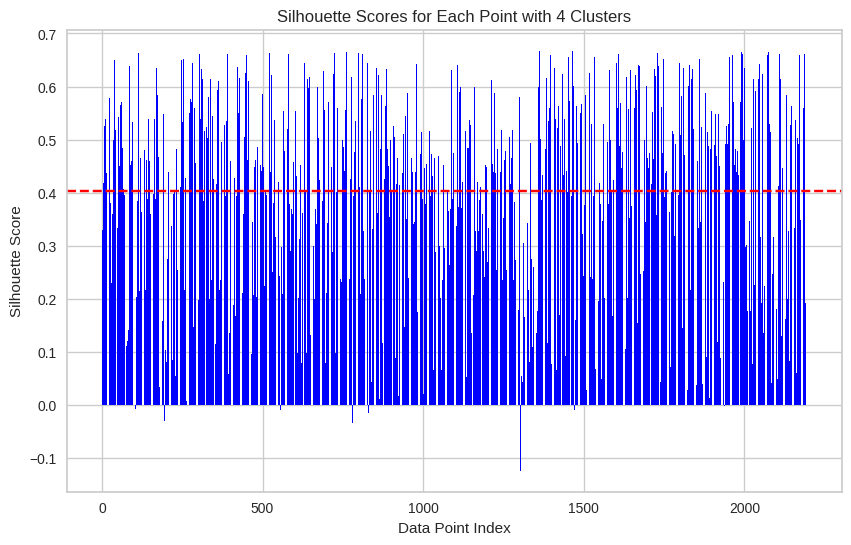

In [ ]:
# Silhouette Score for 4 clusters
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(PCA_ds, kmeans.labels_)
print(f"Silhouette Score with 4 clusters: {sil_score}")

# Davies-Bouldin Score
from sklearn.metrics import davies_bouldin_score
db_score = davies_bouldin_score(PCA_ds, kmeans.labels_)
print(f"Davies-Bouldin Score with 4 clusters: {db_score}")

# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(PCA_ds, kmeans.labels_)
print(f"Calinski-Harabasz Index with 4 clusters: {ch_score}")

# Plot silhouette scores
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(PCA_ds, kmeans.labels_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(PCA_ds)), sample_silhouette_values, color='blue')
plt.axhline(y=sil_score, color='red', linestyle='--')
plt.title("Silhouette Scores for Each Point with 4 Clusters")
plt.xlabel("Data Point Index")
plt.ylabel("Silhouette Score")
plt.show()

Silhouette Score with 5 clusters: 0.3493947605584497
Davies-Bouldin Score with 5 clusters: 0.9741843562414474
Calinski-Harabasz Index with 5 clusters: 1742.9201758144836


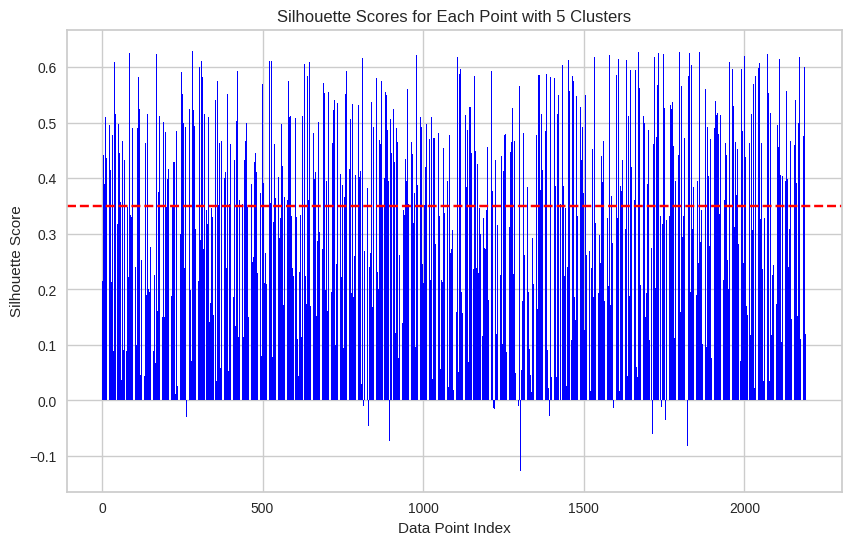

In [ ]:
# Silhouette Score for 5 clusters
from sklearn.metrics import silhouette_score
sil_score5 = silhouette_score(PCA_ds, kmeans5.labels_)
print(f"Silhouette Score with 5 clusters: {sil_score5}")

# Davies-Bouldin Score
from sklearn.metrics import davies_bouldin_score
db_score5 = davies_bouldin_score(PCA_ds, kmeans5.labels_)
print(f"Davies-Bouldin Score with 5 clusters: {db_score5}")

# Calinski-Harabasz Index
from sklearn.metrics import calinski_harabasz_score
ch_score5 = calinski_harabasz_score(PCA_ds, kmeans5.labels_)
print(f"Calinski-Harabasz Index with 5 clusters: {ch_score5}")

# Plot silhouette scores
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(PCA_ds, kmeans5.labels_)

plt.figure(figsize=(10, 6))
plt.bar(range(len(PCA_ds)), sample_silhouette_values, color='blue')
plt.axhline(y=sil_score5, color='red', linestyle='--')
plt.title("Silhouette Scores for Each Point with 5 Clusters")
plt.xlabel("Data Point Index")
plt.ylabel("Silhouette Score")
plt.show()

**Observation:** Model with 2 clusters has better model metrices as compared to models with clusters 4 and 5

# Concusion

📊 In this notebook, we conducted a thorogh EDA to find out uncover different cutomer profiles based on their Marital Status, Age Group, Education and Income.

🛍 We also examined the shopping habbits for customer segment - providing valueable insights which can be useful for creating customized promotional strategies.

🖥 Additionally, we developed three KMeans clustering models with 2, 4, and 5 clusters. For each model, we analyzed how marketing teams can effectively approach their respective customer groups.


**-----------------------------------------------**</br>**Step 1: Identify Relevant Variables**</br>
We'll check which variables (excluding income) might influence total expenses.

In [ ]:
# Exclude 'Income' and check correlation with 'Total_Expenses'
correlation_matrix = df.drop(columns=['Income']).corr()

# Sort correlations based on 'Total_Expenses'
correlation_sorted = correlation_matrix['Total_Expenses'].sort_values(ascending=False)
print(correlation_sorted)

Total_Expenses         1.000000
MntWines               0.897076
MntMeatProducts        0.857216
NumCatalogPurchases    0.799102
Tot_Purchases          0.758661
NumStorePurchases      0.683164
MntFishProducts        0.642371
MntFruits              0.617836
MntSweetProducts       0.614708
NumWebPurchases        0.544810
MntGoldProds           0.534999
AcceptedCmp5           0.463547
Tot_AcceptedCmp        0.448801
Cluster                0.379756
AcceptedCmp1           0.376511
Response               0.257734
AcceptedCmp4           0.239325
AcceptedCmp2           0.138229
Age                    0.123126
AcceptedCmp3           0.056371
Recency                0.024066
Marital_Status        -0.018623
Complain              -0.036892
Education             -0.056384
NumDealsPurchases     -0.070044
Year_Birth            -0.120735
Teenhome              -0.134445
NumWebVisitsMonth     -0.497658
Total_children        -0.498047
Kidhome               -0.556604
Name: Total_Expenses, dtype: float64


**Step 2: Perform Correlation Analysis**</br>
We'll visualize correlations to understand relationships better.

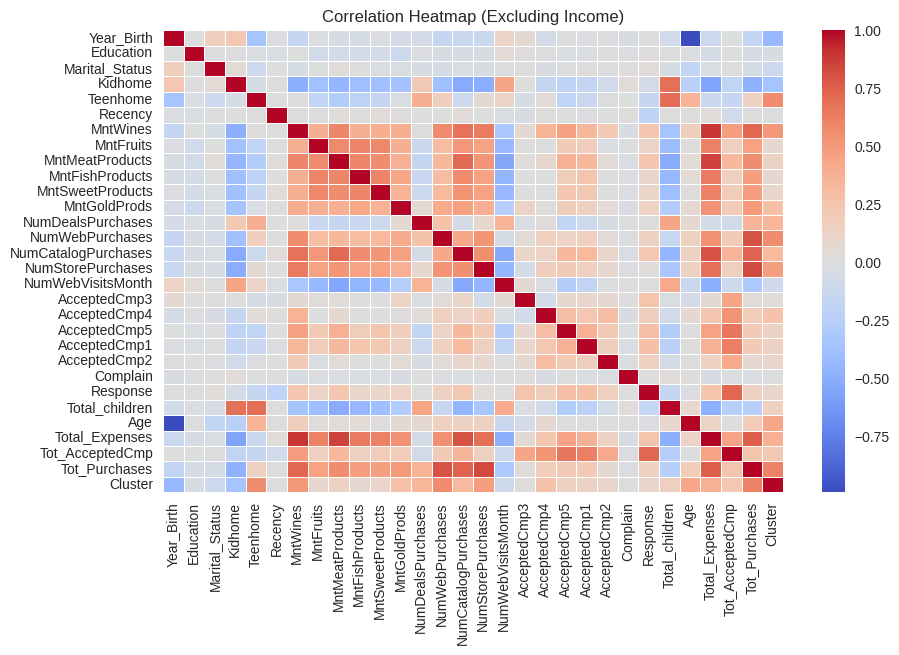

In [ ]:
# Plot correlation heatmap for top 10 most correlated variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Income)')
plt.show()


# Key Observations

1.   Strongest Positive Correlations:


*   MntWines (0.89), MntMeatProducts (0.85) → People who spend more on these products tend to have higher total expenses.
*   NumCatalogPurchases (0.79), Tot_Purchases (0.75) → More purchases across channels = higher spending.
* AcceptedCmp5 (0.46), Tot_AcceptedCmp (0.44) → Customers who accepted more campaigns tend to spend more.


2.   Strongest Negative Correlations:

* Kidhome (-0.55), Total_children (-0.49) → More children at home = lower total spending.
* NumWebVisitsMonth (-0.49) → More website visits might indicate hesitant buyers who browse but don’t spend much.









In [ ]:
selected_features = [
    'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Tot_Purchases',
    'NumStorePurchases', 'MntFishProducts', 'MntFruits', 'MntSweetProducts',
    'NumWebPurchases', 'MntGoldProds', 'AcceptedCmp5', 'Tot_AcceptedCmp',
    'Cluster', 'AcceptedCmp1', 'Response', 'AcceptedCmp4', 'AcceptedCmp2',
    'Age', 'AcceptedCmp3', 'Recency', 'Marital_Status', 'Complain', 'Education',
    'NumDealsPurchases', 'Year_Birth', 'Teenhome', 'NumWebVisitsMonth', 'Total_children', 'Kidhome'
]

In [ ]:
df_model = df[selected_features + ['Total_Expenses']].copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Split data into training and testing sets

X = df_model.drop(columns=['Total_Expenses'])  # Features
y = df_model['Total_Expenses']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Train a Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Make Predictions
y_pred = model.predict(X_test_scaled)

#Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print evaluation metrics
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.4f}')

MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2 Score: 1.0000


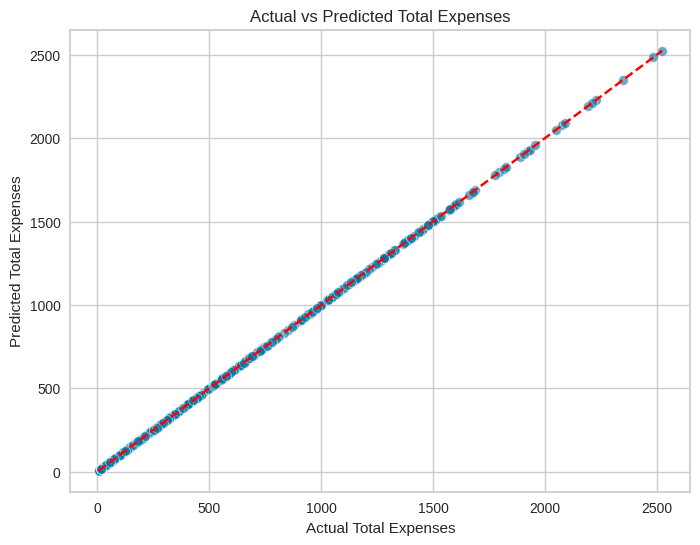

In [ ]:
#Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Total Expenses')
plt.ylabel('Predicted Total Expenses')
plt.title('Actual vs Predicted Total Expenses')
plt.show()

In [ ]:
# Analyze feature importance (if available in the model)
if hasattr(model, 'coef_'):
  feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
  display(feature_importance.sort_values(by='Importance', ascending=False))

,Feature,Importance
0,MntWines,3.377997e+02
1,MntMeatProducts,2.159821e+02
5,MntFishProducts,5.534571e+01
9,MntGoldProds,5.138398e+01
7,MntSweetProducts,4.021405e+01
6,MntFruits,3.910093e+01
16,AcceptedCmp2,9.103109e-13
23,NumDealsPurchases,6.716849e-13
19,Recency,4.263256e-13
2,NumCatalogPurchases,3.053358e-13
